# MACHINE LEARNING III

## In depth: Naive Bayes Classification

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Gaussian Naive Bayes

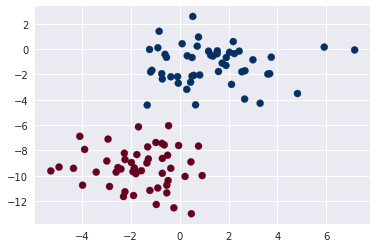

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100,2, centers = 2, random_state = 2, cluster_std = 1.5)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap ='RdBu')

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None)

In [5]:
rng = np.random.RandomState(42)
Xnew = [-6,-14] + [14,18]*rng.rand(2000,2)
ynew = model.predict(Xnew)

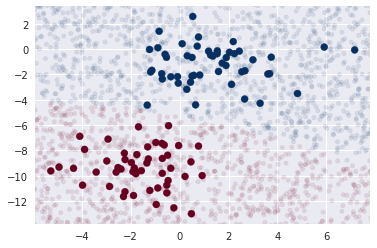

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [7]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.83,  0.17],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ]])

### Multionomial Naive Bayes

In [8]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

INFO:sklearn.datasets.twenty_newsgroups:Downloading 20news dataset. This may take a few minutes.
INFO:sklearn.datasets.twenty_newsgroups:Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset ='test', categories =categories)

In [10]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [15]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(91.68,0.5,'predicted label')

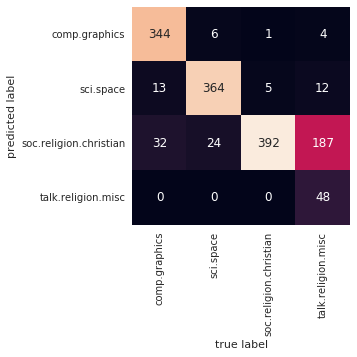

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, 
           xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [17]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [18]:
predict_category('sending a payload to the ISS')

'sci.space'

In [19]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [20]:
predict_category('determining the screen resolution')

'comp.graphics'